In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings

from pandas.api.types import is_numeric_dtype, is_float_dtype
import matplotlib.style as style

pd.set_option('display.float_format', lambda x: '%2f' %x)
pd.options.display.max_columns = None

warnings.filterwarnings('ignore')
from datetime import datetime as dt

# Set default font size
plt.rcParams['font.size'] = 10

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

In [186]:
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

### EDA

In [187]:
df.head(5)

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan         289356.000000   
1           180  FT WASHINGTON AVENUE  Manhattan        3693539.000000   
2          3975              BROADWAY  Manhattan         152765.000000   
3           161  FT WASHINGTON AVENUE  Manhattan         891040.000000   
4           193  FT WASHINGTON AVENUE  Manhattan         211400.000000   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

***Notes:***
- There are many values shown as Not available. Need to convert them to Null values.
- Many numerical values are in form of object. 

In [189]:
df.shape

(11746, 60)

In [190]:
# unique features in caegorical columns
for i in df.columns:
    print(f'There are {df[i].nunique()} number of unique values in feature {i}')
    print('-'*125)

There are 11746 number of unique values in feature Order
-----------------------------------------------------------------------------------------------------------------------------
There are 11746 number of unique values in feature Property Id
-----------------------------------------------------------------------------------------------------------------------------
There are 11740 number of unique values in feature Property Name
-----------------------------------------------------------------------------------------------------------------------------
There are 102 number of unique values in feature Parent Property Id
-----------------------------------------------------------------------------------------------------------------------------
There are 103 number of unique values in feature Parent Property Name
-----------------------------------------------------------------------------------------------------------------------------
There are 11580 number of unique values in feat

But before all this lets begin by dropping columns which have unique values or won't have any contribution for prediction.

In [191]:
df.drop(columns=['Order','Property Id','Property Name','Parent Property Name','Parent Property Id','BBL - 10 digits',
   'Address 1 (self-reported)','Address 2','Release Date','Postal Code','Street Name', 'Street Number','Latitude','Longitude',
                 'NYC Building Identification Number (BIN)','NYC Borough, Block and Lot (BBL) self-reported'],inplace=True)

In [192]:
df.shape

(11746, 44)

In [193]:
# mnay cells have values 'Not avialbale', will replace that 'Not available' with Null values
df = df.replace({'Not Available':np.nan})

In [194]:
df.head(2)

Borough  DOF Gross Floor Area  Primary Property Type - Self Selected  \
0  Manhattan         289356.000000                                 Office   
1  Manhattan        3693539.000000  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   

  2nd Largest Property Use Type  \
0                           NaN   
1                           NaN   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                               NaN   
1                                               NaN   

  3rd Largest Property Use Type  \
0                           NaN   
1                           NaN   

  3rd Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
0                                                NaN            1963   
1                                                NaN            1969   

   Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
0                                    2        100         Whole Building   
1                                   12        100         Whole Building   

  Metered Areas  (Water) ENERGY STAR Score Site EUI (kBtu/ft²)  \
0                    NaN               NaN               305.6   
1         Whole Building                55               229.8   

  Weather Normalized Site EUI (kBtu/ft²)  \
0                                  303.1   
1                                  228.8   

  Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                               37.8        
1                                               24.8        

  Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                NaN           
1                                                2.4           

  Weather Normalized Source EUI (kBtu/ft²) Fuel Oil #1 Use (kBtu)  \
0                                    614.2                    NaN   
1                                    401.1                    NaN   

  Fuel Oil #2 Use (kBtu) Fuel Oil #4 Use (kBtu) Fuel Oil #5 & 6 Use (kBtu)  \
0                    NaN                    NaN                        NaN   
1           1.96248472E7                    NaN                        NaN   

  Diesel #2 Use (kBtu) District Steam Use (kBtu) Natural Gas Use (kBtu)  \
0                  NaN              5.15506751E7                    NaN   
1                  NaN            -3.914148026E8              933073441   

  Weather Normalized Site Natural Gas Use (therms)  \
0                                              NaN   
1                                        9330734.4   

  Electricity Use - Grid Purchase (kBtu)  \
0                             38139374.2   
1                              332365924   

  Weather Normalized Site Electricity (kWh)  \
0                              1.10827705E7   
1                              9.62613121E7   

  Total GHG Emissions (Metric Tons CO2e)  \
0                                 6962.2   
1                                55870.4   

  Direct GHG Emissions (Metric Tons CO2e)  \
0                                       0   
1                                 51016.4   

  Indirect GHG Emissions (Metric Tons CO2e)  \
0                                    6962.2   
1                                    4854.1   

   Property GFA - Self-Reported (ft²) Water Use (All Water Sources) (kgal)  \
0                              762051                                  NaN   
1                             3889181                                  NaN   

  Water Intensity (All Water Sources) (g

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 44 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     11628 non-null  object 
 1   DOF Gross Floor Area                                        11628 non-null  float64
 2   Primary Property Type - Self Selected                       11746 non-null  object 
 3   List of All Property Use Types at Property                  11746 non-null  object 
 4   Largest Property Use Type                                   11744 non-null  object 
 5   Largest Property Use Type - Gross Floor Area (ft²)          11744 non-null  object 
 6   2nd Largest Property Use Type                               3741 non-null   object 
 7   2nd Largest Property Use - Gross Floor Area (ft²)           3741 non-null   object 
 

##### Before converting numerical features lets check missing values and drop features which have more than 60% data missing. 

In [196]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_data = pd.concat([total[total>0], percent[percent>0]], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Fuel Oil #1 Use (kBtu)                              11737 99.920000
Diesel #2 Use (kBtu)                                11730 99.860000
Fuel Oil #5 & 6 Use (kBtu)                          11152 94.940000
District Steam Use (kBtu)                           10810 92.030000
Fuel Oil #4 Use (kBtu)                              10425 88.750000
3rd Largest Property Use Type                       10262 87.370000
3rd Largest Property Use Type - Gross Floor Are...  10262 87.370000
Fuel Oil #2 Use (kBtu)                               9165 78.030000
2nd Largest Property Use Type                        8005 68.150000
2nd Largest Property Use - Gross Floor Area (ft²)    8005 68.150000
Metered Areas  (Water)                               4609 39.240000
Water Intensity (All Water Sources) (gal/ft²)        3984 33.920000
Water Use (All Water Sources) (kgal)                 3984 33.920000
Census Tract                                         2263 19.270000
Council District                                     2263 19.270000
Community Board                                      2263 19.270000
NTA                                                  2263 19.270000
ENERGY STAR Score                                    2104 17.910000
Weather Normalized Site Natural Gas Intensity (...   1963 16.710000
Weather Normalized Site Natural Gas Use (therms)     1962 16.700000
Weather Normalized Site EUI (kBtu/ft²)               1465 12.470000
Weather Normalized Source EUI (kBtu/ft²)             1465 12.470000
Natural Gas Use (kBtu)                               1442 12.280000
Weather Normalized Site Electricity Intensity (...    787  6.700000
Weather Normalized Site Electricity (kWh)             786  6.690000
Electricity Use - Grid Purchase (kBtu)                244  2.080000
Site EUI (kBtu/ft²)                                   163  1.390000
Source EUI (kBtu/ft²)                                 163  1.390000
Borough                                               118  1.000000
DOF Gross Floor Area                                  118  1.000000
Water Required?                                       118  1.000000
Direct GHG Emissions (Metric Tons CO2e)                83  0.710000
Total GHG Emissions (Metric Tons CO2e)                 74  0.630000
Indirect GHG Emissions (Metric Tons CO2e)              65  0.550000
Metered Areas (Energy)                                 57  0.490000
DOF Benchmarking Submission Status                     30  0.260000
Largest Property Use Type                               2  0.020000
Largest Property Use Type - Gross Floor Area (ft²)      2  0.020000

In [197]:
df.shape

(11746, 44)

In [198]:
# list of columns with 60% missing data
df.drop(columns=missing_data[missing_data['Percent']>=60].index,inplace=True)

In [199]:
df.shape

(11746, 34)

In [200]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_data = pd.concat([total[total>0], percent[percent>0]], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Metered Areas  (Water)                               4609 39.240000
Water Intensity (All Water Sources) (gal/ft²)        3984 33.920000
Water Use (All Water Sources) (kgal)                 3984 33.920000
NTA                                                  2263 19.270000
Census Tract                                         2263 19.270000
Council District                                     2263 19.270000
Community Board                                      2263 19.270000
ENERGY STAR Score                                    2104 17.910000
Weather Normalized Site Natural Gas Intensity (...   1963 16.710000
Weather Normalized Site Natural Gas Use (therms)     1962 16.700000
Weather Normalized Site EUI (kBtu/ft²)               1465 12.470000
Weather Normalized Source EUI (kBtu/ft²)             1465 12.470000
Natural Gas Use (kBtu)                               1442 12.280000
Weather Normalized Site Electricity Intensity (...    787  6.700000
Weather Normalized Site Electricity (kWh)             786  6.690000
Electricity Use - Grid Purchase (kBtu)                244  2.080000
Site EUI (kBtu/ft²)                                   163  1.390000
Source EUI (kBtu/ft²)                                 163  1.390000
Water Required?                                       118  1.000000
Borough                                               118  1.000000
DOF Gross Floor Area                                  118  1.000000
Direct GHG Emissions (Metric Tons CO2e)                83  0.710000
Total GHG Emissions (Metric Tons CO2e)                 74  0.630000
Indirect GHG Emissions (Metric Tons CO2e)              65  0.550000
Metered Areas (Energy)                                 57  0.490000
DOF Benchmarking Submission Status                     30  0.260000
Largest Property Use Type - Gross Floor Area (ft²)      2  0.020000
Largest Property Use Type                               2  0.020000

In [201]:
# renaming energy star score column
df.rename(columns={'ENERGY STAR Score':'score'},inplace=True)

In [202]:
df1 = df.copy()

In [203]:
import re

col_num = []
col_cate = []

# regular expression pattern to match float
float_pattern = r'^[-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?$'

for col in df.columns:
    if df[col].apply(lambda x: bool(re.match(float_pattern, str(x)))).any():
        col_num.append(col)
    else:
        col_cate.append(col)
        
print(f'There are total {len(col_num)} numerical columns.\n',col_num)
print('-'*125)
print(f'There are total {len(col_cate)} categorical columns.\n',col_cate)

There are total 25 numerical columns.
 ['DOF Gross Floor Area', 'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)', 'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ft²)', 'Source EUI (kBtu/ft²)', 'Community Board', 'Council District', 'Census Tract']
---------------------------------------------------------------------------

In [204]:
# converting object to numerical features
df[col_num] = df[col_num].apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [205]:
df.head(2)

Borough  DOF Gross Floor Area  Primary Property Type - Self Selected  \
0  Manhattan         289356.000000                                 Office   
1  Manhattan        3693539.000000  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   

   Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
0                                      293447.000000         1963   
1                                     3889181.000000         1969   

   Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
0                                    2        100         Whole Building   
1                                   12        100         Whole Building   

  Metered Areas  (Water)     score  Site EUI (kBtu/ft²)  \
0                    NaN       NaN           305.600000   
1         Whole Building 55.000000           229.800000   

   Weather Normalized Site EUI (kBtu/ft²)  \
0                              303.100000   
1                              228.800000   

   Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                          37.800000         
1                                          24.800000         

   Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                NaN            
1                                           2.400000            

   Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
0                                614.200000                     NaN   
1                                401.100000        933073441.000000   

   Weather Normalized Site Natural Gas Use (therms)  \
0                                               NaN   
1                                    9330734.400000   

   Electricity Use - Grid Purchase (kBtu)  \
0                         38139374.200000   
1                        332365924.000000   

   Weather Normalized Site Electricity (kWh)  \
0                            11082770.500000   
1                            96261312.100000   

   Total GHG Emissions (Metric Tons CO2e)  \
0                             6962.200000   
1                            55870.400000   

   Direct GHG Emissions (Metric Tons CO2e)  \
0                                 0.000000   
1                             51016.400000   

   Indirect GHG Emissions (Metric Tons CO2e)  \
0                                6962.200000   
1                                4854.100000   

   Property GFA - Self-Reported (ft²)  Water Use (All Water Sources) (kgal)  \
0                              762051                                   NaN   
1                             3889181                                   NaN   

   Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
0                                            NaN             619.400000   
1                                            NaN             404.300000   

  Water Required? DOF Benchmarking Submission Status  Community Board  \
0              No                      In Compliance         6.000000   
1              No                      In Compliance        12.000000   

   Council District  Census Tract  \
0          4.000000     88.000000   
1         10.000000    251.000000   

                                                 NTA  
0  Turtle Bay-East Midtown                       ...  
1  Washington Heights South                      ...

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 34 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     11628 non-null  object 
 1   DOF Gross Floor Area                                        11628 non-null  float64
 2   Primary Property Type - Self Selected                       11746 non-null  object 
 3   List of All Property Use Types at Property                  11746 non-null  object 
 4   Largest Property Use Type                                   11744 non-null  object 
 5   Largest Property Use Type - Gross Floor Area (ft²)          11744 non-null  float64
 6   Year Built                                                  11746 non-null  int64  
 7   Number of Buildings - Self-reported                         11746 non-null  int64  
 

##### We have required features to numeric dtype. 

In [207]:
df.describe()

DOF Gross Floor Area  \
count          11628.000000   
mean          173269.454420   
std           336705.454590   
min            50028.000000   
25%            65240.000000   
50%            93138.500000   
75%           159614.000000   
max         13540113.000000   

       Largest Property Use Type - Gross Floor Area (ft²)   Year Built  \
count                                       11744.000000  11746.000000   
mean                                       160552.399072   1948.738379   
std                                        309574.597548     30.576386   
min                                            54.000000   1600.000000   
25%                                         65201.000000   1927.000000   
50%                                         91324.000000   1941.000000   
75%                                        153255.000000   1966.000000   
max                                      14217119.000000   2019.000000   

       Number of Buildings - Self-reported    Occupancy       score  \
count                         11746.000000 11746.000000 9642.000000   
mean                              1.289971    98.762557   59.854594   
std                               4.017484     7.501603   29.993586   
min                               0.000000     0.000000    1.000000   
25%                               1.000000   100.000000   37.000000   
50%                               1.000000   100.000000   65.000000   
75%                               1.000000   100.000000   85.000000   
max                             161.000000   100.000000  100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%                                             3.800000         
50%                                             5.300000         
75%                                             9.200000         
max                                          6259.400000         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
count                                        9783.000000            
mean                                            1.901441            
std                                            97.204587            
min                                             0.000000            
25%                                             0.100000            
50%                                             0.500000            
75%                                             0.700000            
max                                          9393.000000            

       Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
count                              10281.000000            10304.000000   
mean                                 417.915709         50485452.734443   
std                                10530.524339       3914719037.610519   
min                                    0.000000                0.000000   
25%                                  103.500000          1098250.800000   
50%                                  129.400000          4103962.150000   
75%                                  167.200000

Looks like some serious outliers are present in dataset.

# renaming columns
df.rename(columns={'Primary Property Type - Self Selected':'Primary Property Type',
                  'Largest Property Use Type - Gross Floor Area (ft²)':'Largest Property Use Type - GFA',
                  }

### Zero variance check

In [208]:
df.nunique()[df.nunique()==1]

DOF Benchmarking Submission Status    1
dtype: int64

Only one column having no variance. We will drop it. 

In [209]:
df.drop(columns=['DOF Benchmarking Submission Status'],inplace=True)

### Distribution check

<AxesSubplot:xlabel='score', ylabel='Density'>

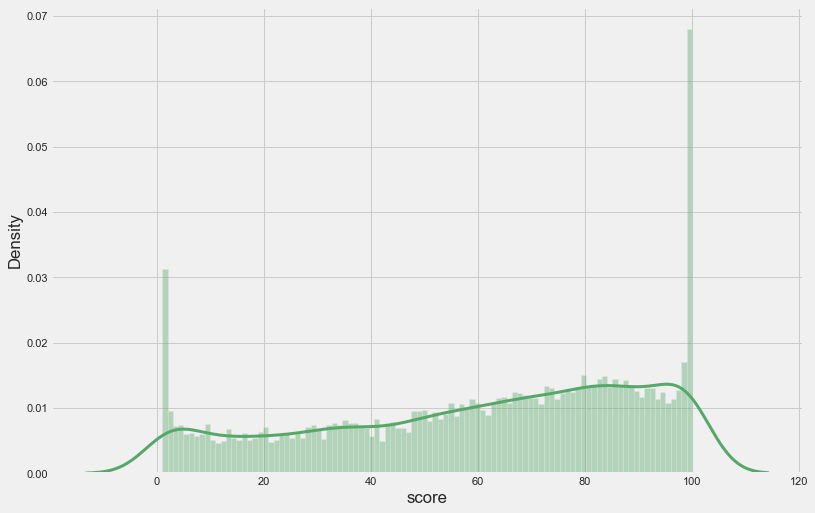

In [210]:
# checking distribution of target variable
style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.distplot(df.score,color='g',kde_kws={'lw':3},bins=100)

***Observation:***
- The distribution is slightly negatively skewed.
- Many building have rating 100. It would interesting to see which buildings are these, their type, area, boroughs. Lets check.

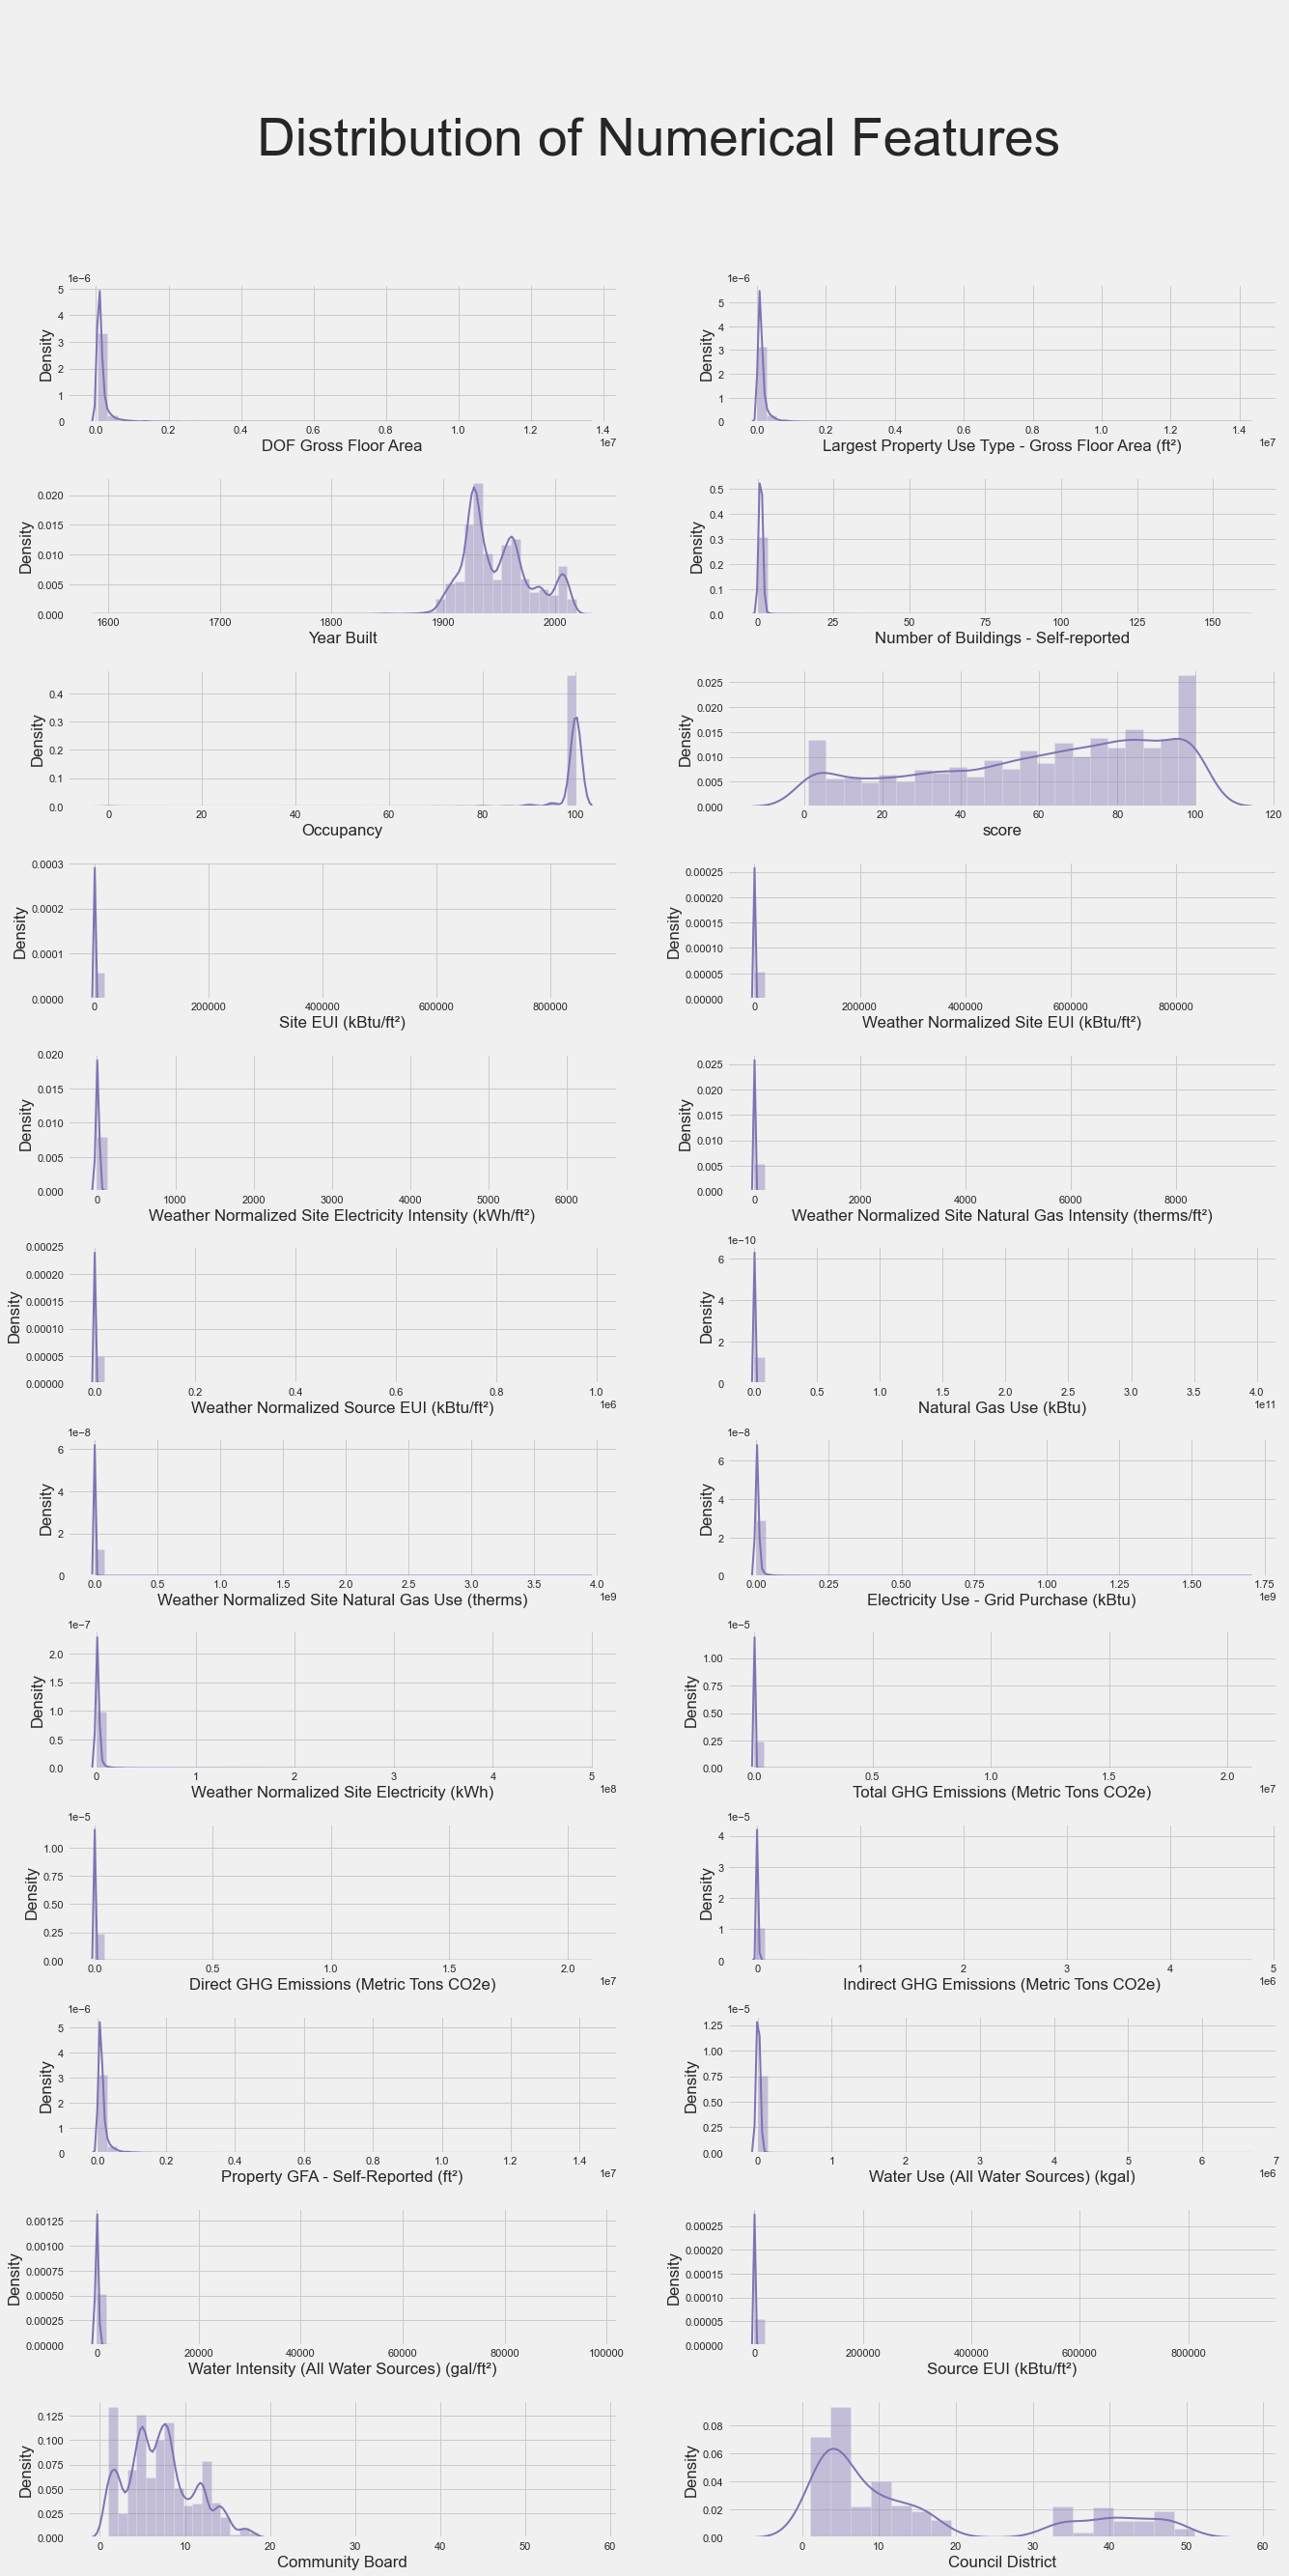

In [211]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(20,40))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('\n\n Distribution of Numerical Features',fontsize=55)

for ax, col in zip(axes.flatten(), col_num):
    figur = sns.distplot(a=df[col], ax=ax,color='m',kde_kws={'lw':2})

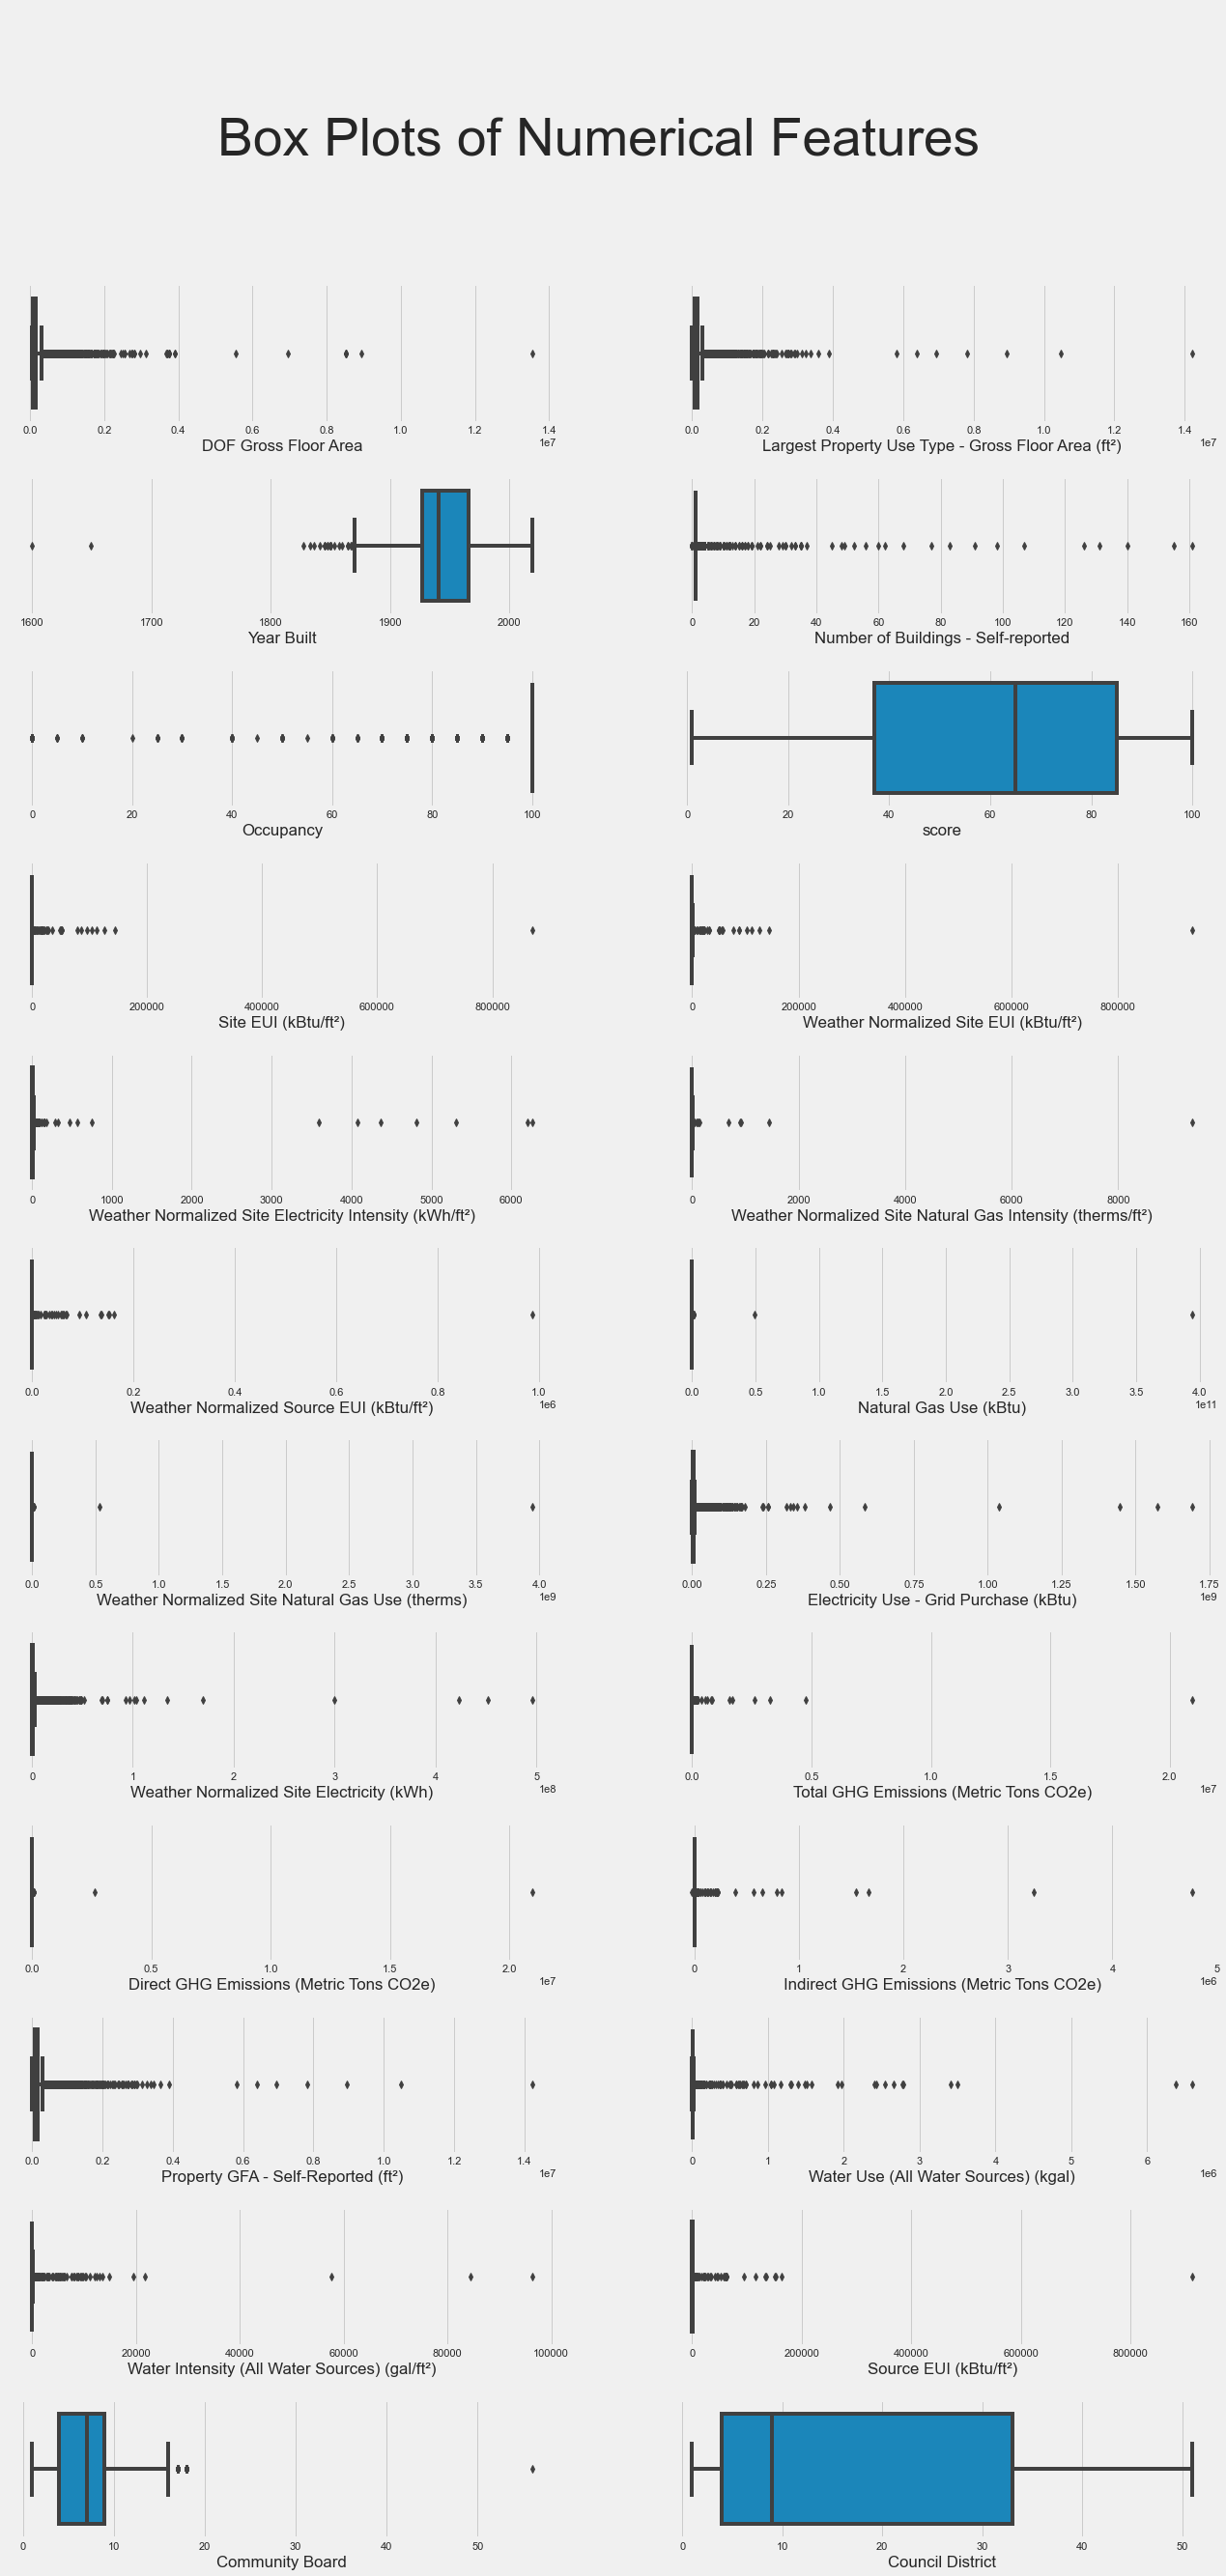

In [212]:
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(20,40))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('\n\n Box Plots of Numerical Features',fontsize=55)

for ax, col in zip(axes.flatten(), col_num):
    figur = sns.boxplot(df[col], ax=ax)

***Notes:***
Many features are highly skewed. There is a strong presence of outliters in dataset.
Lets check correlation matrix and then the magnitude of skewness of features.

### Correlation check

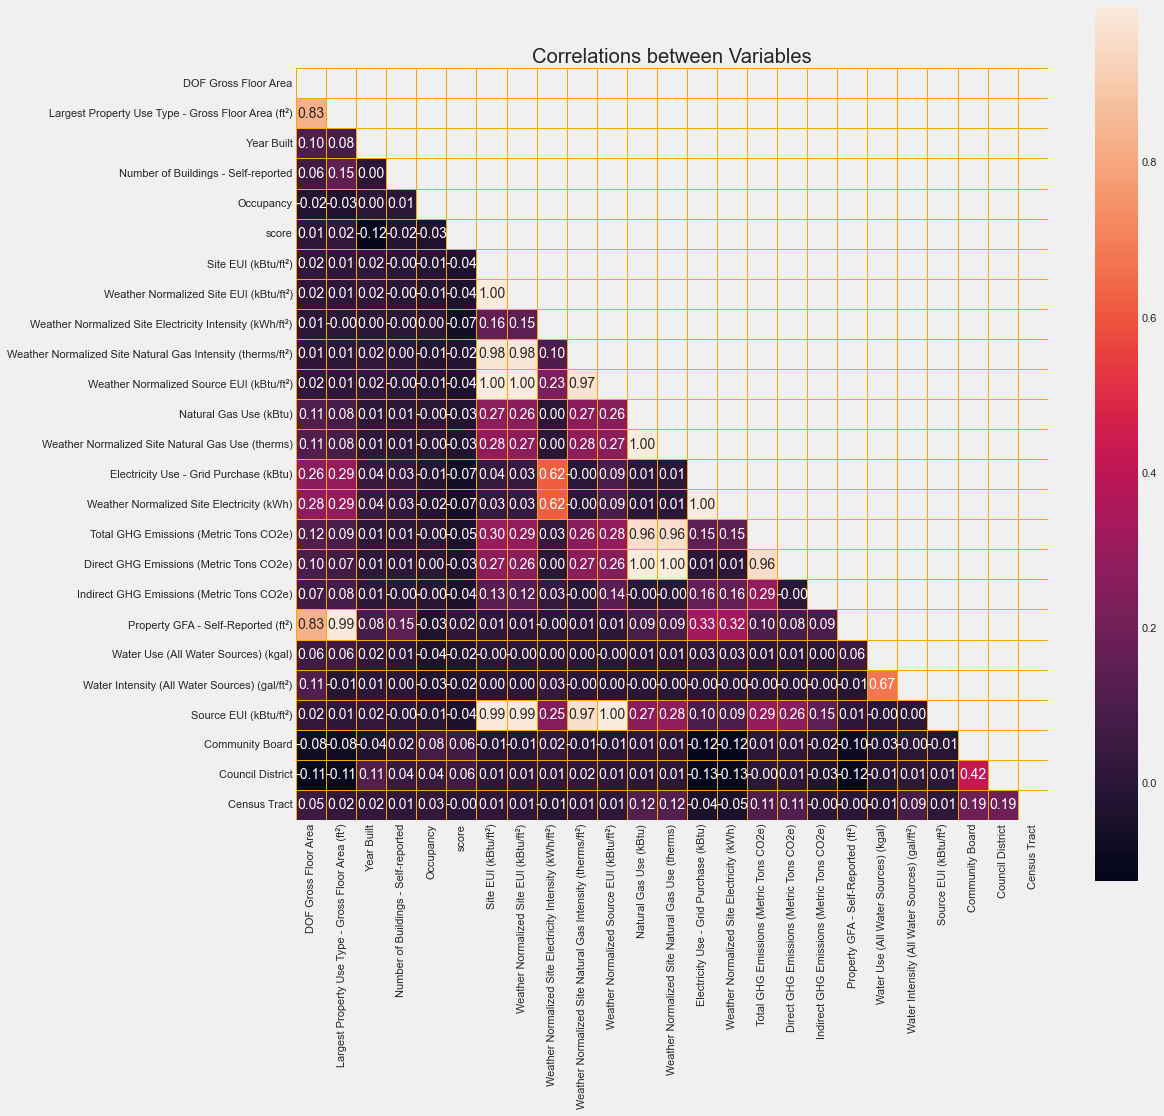

In [213]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlations between Variables')
plt.show()

***Observation:***
- Multicolinearity exist between:
 - DOF Gross Floor Area --> Largest Property Use Type - Gross Floor Area (ft²) and Property GFA - Self-Reported (ft²).
 - Site EUI (kBtu/ft²) --> Source EUI (kBtu/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²), Weather Normalized Source EUI (kBtu/ft²) and Weather Normalized Site EUI (kBtu/ft²)
 - Electricity Use - Grid Purchase (kBtu) --> Weather Normalized Site Electricity (kWh)
 - Natural Gas Use (kBtu) --> Total GHG Emissions (Metric Tons CO2e) and Direct GHG Emissions (Metric Tons CO2e) and Weather Normalized Site Natural Gas Use (therms)
 - Water Use (All Water Sources) (kgal) --> Water Intensity (All Water Sources) (gal/ft²)
- There seems to be almost no correlation between energy star score and predictor variables. This is because of presence of heavy outliers in dataset.

Lets check Skewness of features.

In [214]:
# skewness dictionary
skewness1 = {i:df[i].skew() for i in col_num}
# sort the dictionary by values
skewness1 = dict(sorted(skewness1.items(), key=lambda item: item[1],reverse=True))

In [215]:
skewness1

{'Direct GHG Emissions (Metric Tons CO2e)': 105.69083562018407,
 'Natural Gas Use (kBtu)': 99.34309892520739,
 'Weather Normalized Site Natural Gas Use (therms)': 96.47751117254172,
 'Total GHG Emissions (Metric Tons CO2e)': 94.15575461018227,
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)': 92.73565660788407,
 'Site EUI (kBtu/ft²)': 90.25433904863701,
 'Weather Normalized Site EUI (kBtu/ft²)': 87.05194762945008,
 'Source EUI (kBtu/ft²)': 83.40477576929025,
 'Weather Normalized Source EUI (kBtu/ft²)': 81.5332247987524,
 'Indirect GHG Emissions (Metric Tons CO2e)': 62.397525215843686,
 'Water Intensity (All Water Sources) (gal/ft²)': 42.780991964506505,
 'Weather Normalized Site Electricity Intensity (kWh/ft²)': 41.03217297072062,
 'Electricity Use - Grid Purchase (kBtu)': 37.12063686948912,
 'Weather Normalized Site Electricity (kWh)': 36.38474899816696,
 'Water Use (All Water Sources) (kgal)': 27.70985056212316,
 'Number of Buildings - Self-reported': 26.436334894702576,

##### Many features are highly skewed.  We need to remove Outliers before proceeding ahead.

In [216]:
min1=[]
max1=[]
for i in col_num:

    first_quartile = df[i].describe()['25%']
    third_quartile = df[i].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers (we are considering factor 3 and not 1.5. This is because the data was highly skewed. Keeping factor
    # 1.5 can remove useful information )
    temp2 = df[(df[i] > (first_quartile - 3 * iqr)) &
                (df[i] < (third_quartile + 3 * iqr))]

    correlations_temp2 = temp2.corr()['score'].sort_values()

    min1.append((i,correlations_temp2[-2]))
    max1.append((i,correlations_temp2[0]))
max1 = dict(sorted(max1,key= lambda x: x[1]))
min1 = dict(sorted(min1,key= lambda x: x[-1]))

In [217]:
max1

{'Site EUI (kBtu/ft²)': -0.7238643844646085,
 'Source EUI (kBtu/ft²)': -0.7231056037955376,
 'Weather Normalized Source EUI (kBtu/ft²)': -0.7205981618980272,
 'Weather Normalized Site EUI (kBtu/ft²)': -0.7182957074424275,
 'Total GHG Emissions (Metric Tons CO2e)': -0.65206465606379,
 'Indirect GHG Emissions (Metric Tons CO2e)': -0.39808272939739925,
 'Electricity Use - Grid Purchase (kBtu)': -0.39705177621126997,
 'Weather Normalized Site Electricity (kWh)': -0.3969468698194771,
 'Weather Normalized Site Electricity Intensity (kWh/ft²)': -0.35808791376887394,
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)': -0.3492921585524806,
 'Direct GHG Emissions (Metric Tons CO2e)': -0.33205409799818264,
 'Weather Normalized Site Natural Gas Use (therms)': -0.32579799433182527,
 'Natural Gas Use (kBtu)': -0.3253725772685561,
 'Water Intensity (All Water Sources) (gal/ft²)': -0.23226710933502148,
 'Water Use (All Water Sources) (kgal)': -0.22214031760976008,
 'Census Tract': -0.140784

Since Site EUI has strongest correlation with Energy score. We will remove outliers present in energy star score.

<AxesSubplot:xlabel='Site EUI (kBtu/ft²)', ylabel='Density'>

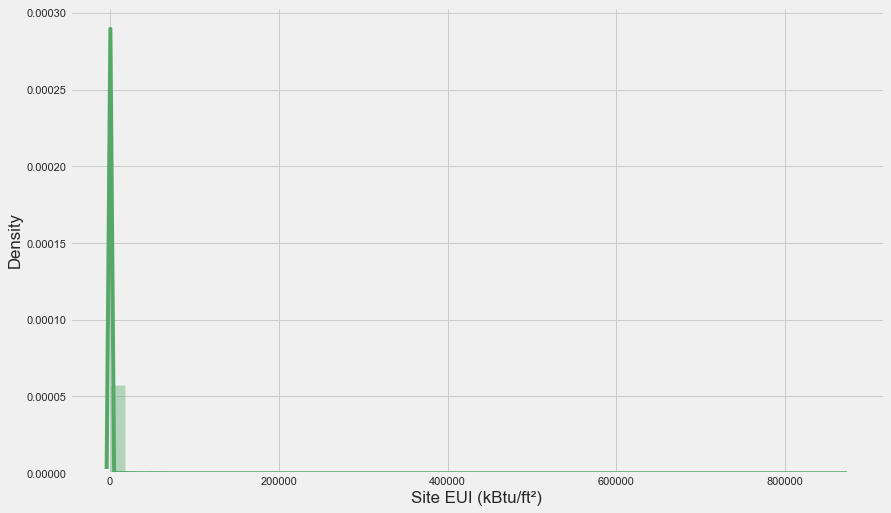

In [218]:
# Distribution Plot before removing outlier
plt.figure(figsize=(13,8))
sns.distplot(a=df1['Site EUI (kBtu/ft²)'],color='g')

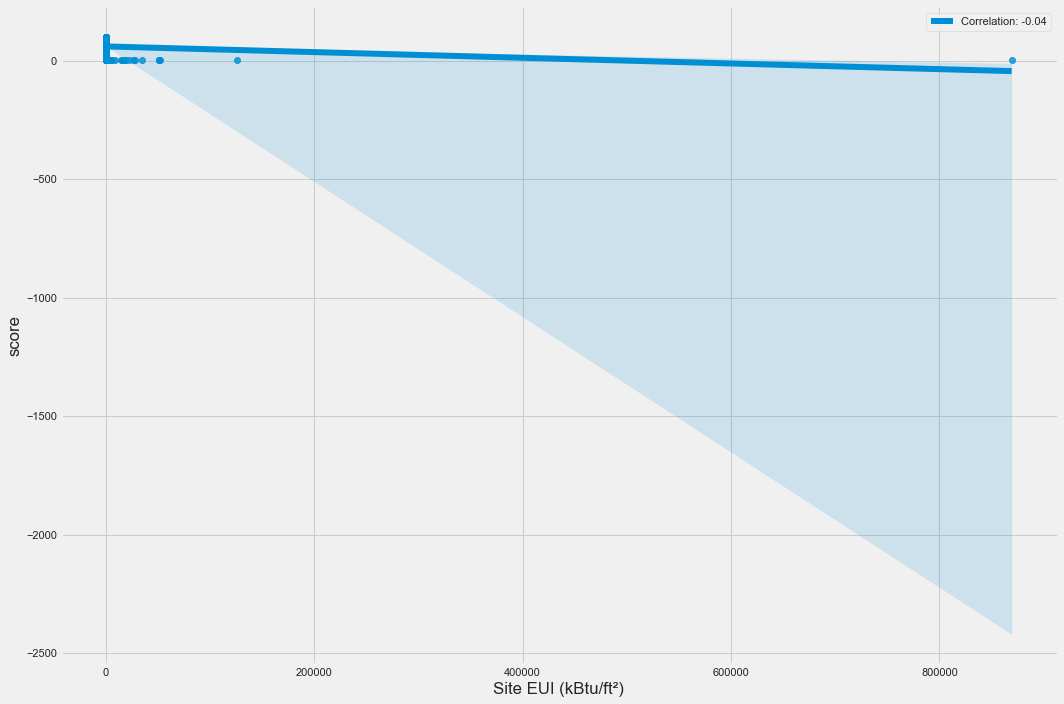

In [219]:
# relation between Site EUI and energy score before removing outlier

sns.lmplot(data=df,x='Site EUI (kBtu/ft²)',y='score',line_kws=
           {"label": f"Correlation: {df['Site EUI (kBtu/ft²)'].corr(df['score']):.2f}"},height=10, aspect=1.5)
plt.legend()
plt.show()

In [220]:
df.shape

(11746, 33)

#### Removing Outliers

In [221]:
first_quartile = df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = df['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df[(df['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) & 
        (df['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

correlations_df = df.corr()['score'].sort_values()

In [222]:
df.shape

(11319, 33)

<AxesSubplot:xlabel='Site EUI (kBtu/ft²)', ylabel='Density'>

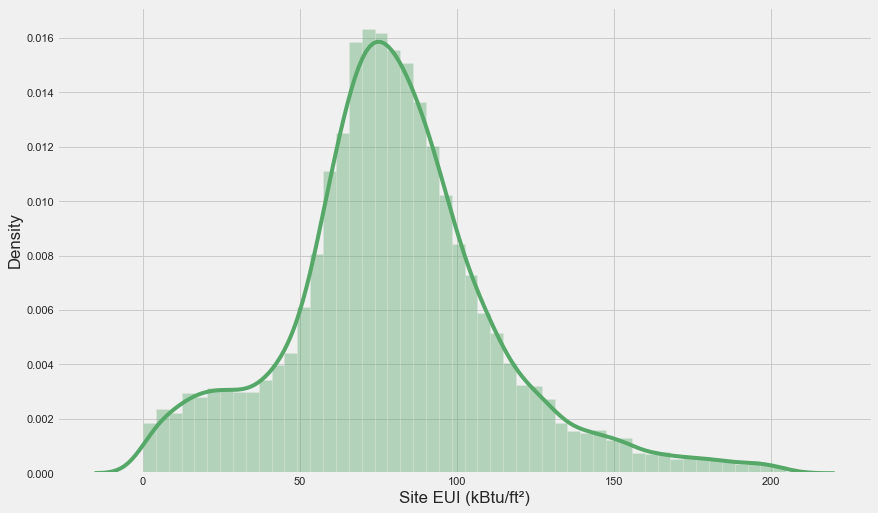

In [223]:
# Distribution Plot after removing outlier
plt.figure(figsize=(13,8))
sns.distplot(a=df['Site EUI (kBtu/ft²)'],color='g')

The distribution looks close to normal after removing outliers.

<Figure size 1080x1080 with 0 Axes>

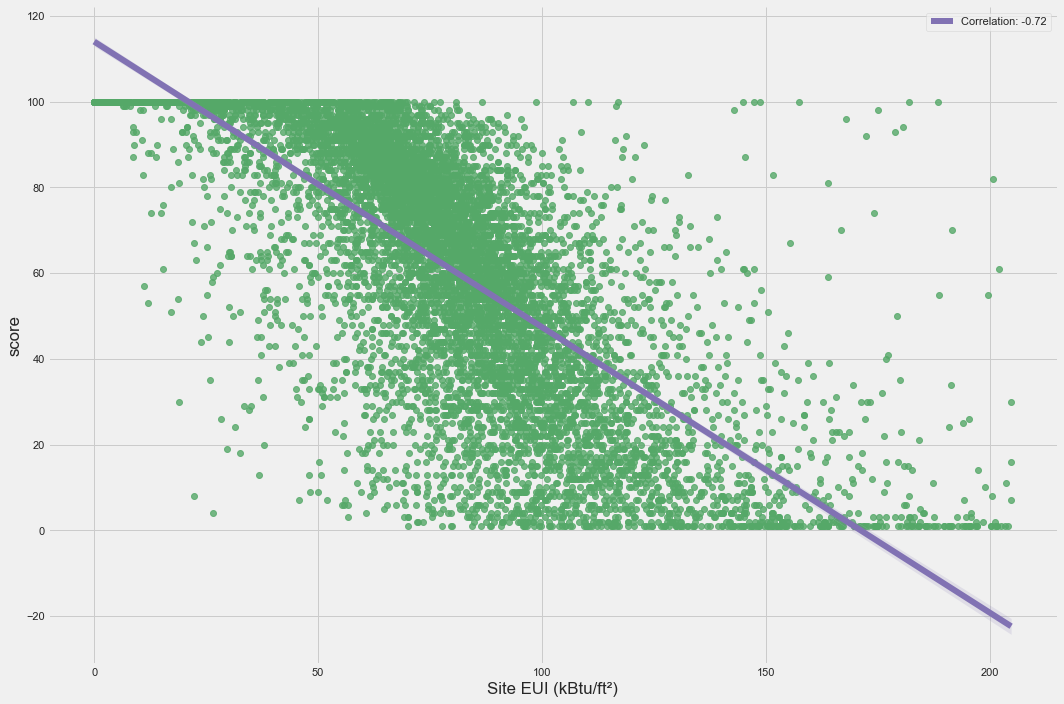

In [224]:
# relation between Site EUI and energy score after removing outlier
plt.figure(figsize=(15,15))
corr_coef = np.corrcoef(df['Site EUI (kBtu/ft²)'],df['score'])[0, 1]

sns.lmplot(data=df,x='Site EUI (kBtu/ft²)',y='score',scatter_kws={"color": "g"},line_kws=
           {"color": "m","label": f"Correlation: {df['Site EUI (kBtu/ft²)'].corr(df['score']):.2f}"},height=10, aspect=1.5)
plt.legend()
plt.show()

Before removing outliers the data looked random. Infact there was no correlation between Site EUI and energy score. Nut now we can clearly see a strong negative correlation of 0.7+ in data.

In [225]:
correlations_df

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Indirect GHG Emissions (Metric Tons CO2e)                    -0.043982
Occupa

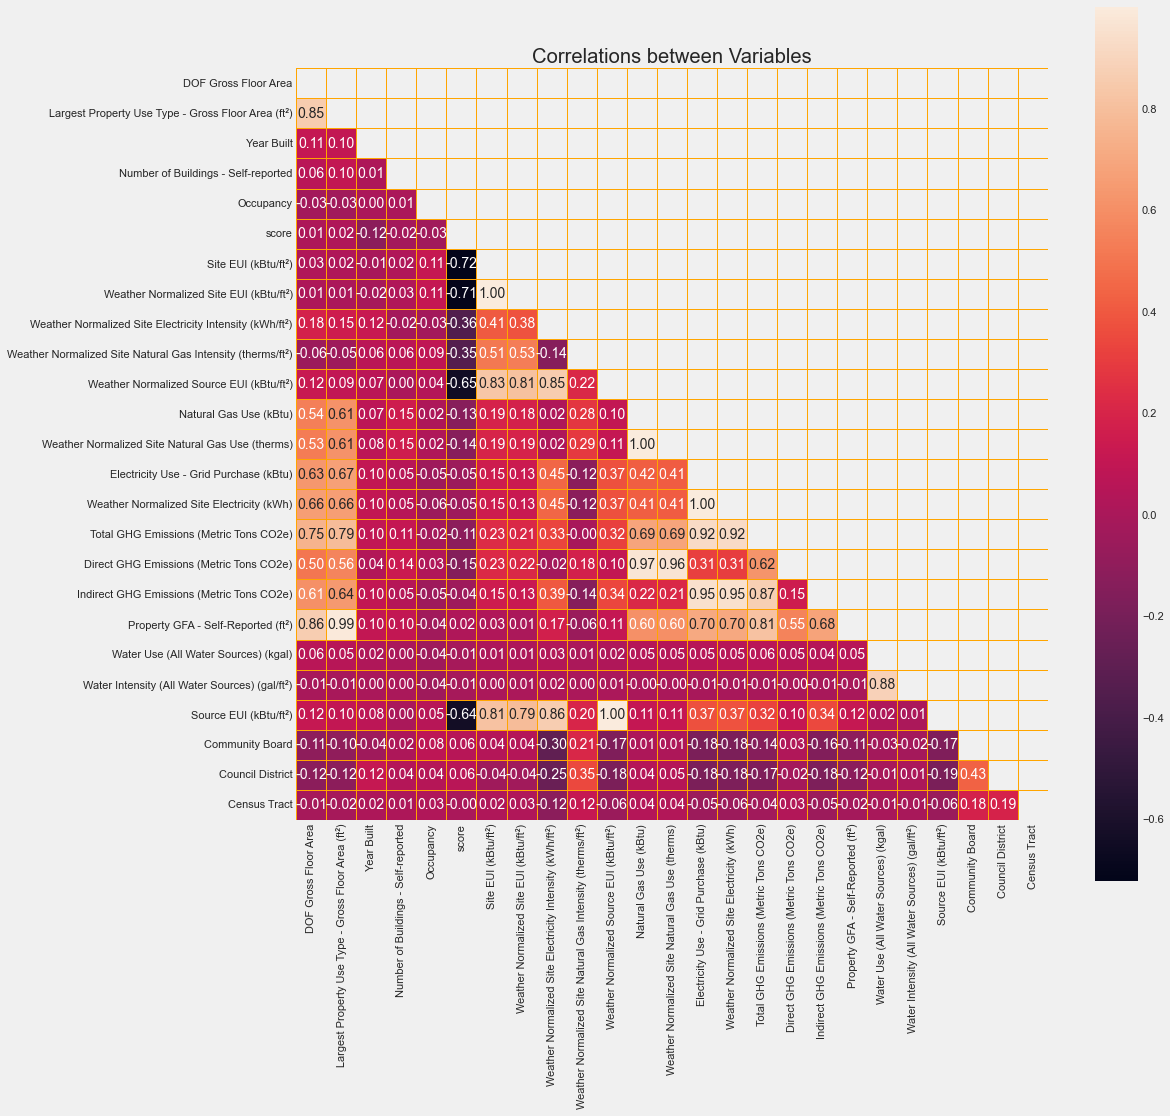

In [226]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlations between Variables')
plt.show()

##### This looks much better. By removing outliers we are able to create a case for majority of data. Thus, many predictor variables are now showing strong correlations with score.

In [227]:
# skewness dictionary
skewness1 = {i:df[i].skew() for i in col_num}
# sort the dictionary by values
skewness1 = dict(sorted(skewness1.items(), key=lambda item: item[1],reverse=True))
skewness1

{'Water Intensity (All Water Sources) (gal/ft²)': 45.158203384447084,
 'Direct GHG Emissions (Metric Tons CO2e)': 33.96690261573578,
 'Natural Gas Use (kBtu)': 31.64410097734879,
 'Weather Normalized Site Natural Gas Use (therms)': 30.589623381927836,
 'Water Use (All Water Sources) (kgal)': 30.261244940169906,
 'Number of Buildings - Self-reported': 27.009945898127352,
 'Largest Property Use Type - Gross Floor Area (ft²)': 19.671821153488416,
 'Property GFA - Self-Reported (ft²)': 18.174536112373413,
 'DOF Gross Floor Area': 17.966168117804138,
 'Total GHG Emissions (Metric Tons CO2e)': 13.330682955457434,
 'Electricity Use - Grid Purchase (kBtu)': 11.09579906036226,
 'Weather Normalized Site Electricity (kWh)': 10.968813438290372,
 'Indirect GHG Emissions (Metric Tons CO2e)': 10.875182836128007,
 'Census Tract': 3.7699860898302995,
 'Weather Normalized Site Electricity Intensity (kWh/ft²)': 2.2781113473972017,
 'Source EUI (kBtu/ft²)': 1.441423532461086,
 'Weather Normalized Source E

In [228]:
# function for scatter plot
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="score", template = 'plotly_dark')
    return fig.show()

In [229]:
scatter('DOF Gross Floor Area','Electricity Use - Grid Purchase (kBtu)')

There is linear relationship between DOF Gross Floor Area' and 'Electricity Use - Grid Purchase (kBtu)

In [230]:
scatter('DOF Gross Floor Area','Natural Gas Use (kBtu)')

In [231]:
scatter('DOF Gross Floor Area','Water Use (All Water Sources) (kgal)')

In [232]:
df.columns

Index(['Borough', 'DOF Gross Floor Area',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - S

checking importance of variables like - 
- Street Number 
- Street Name 
- Borough
- List of All Property Use Types at Property
- Community Board
- Council District Census Tract NTA

Amongst these lets drop Street name, List of All Property Use Types at Property because they are too high in number which will lead to incrase in dimensionality. Plus they 

In [233]:
# dictionary of unique value count
uni_val_count = {i:df[i].nunique() for i in df.columns}
uni_val_count

{'Borough': 5,
 'DOF Gross Floor Area': 9041,
 'Primary Property Type - Self Selected': 50,
 'List of All Property Use Types at Property': 779,
 'Largest Property Use Type': 48,
 'Largest Property Use Type - Gross Floor Area (ft²)': 9171,
 'Year Built': 154,
 'Number of Buildings - Self-reported': 47,
 'Occupancy': 19,
 'Metered Areas (Energy)': 6,
 'Metered Areas  (Water)': 6,
 'score': 100,
 'Site EUI (kBtu/ft²)': 1704,
 'Weather Normalized Site EUI (kBtu/ft²)': 1732,
 'Weather Normalized Site Electricity Intensity (kWh/ft²)': 346,
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)': 20,
 'Weather Normalized Source EUI (kBtu/ft²)': 2580,
 'Natural Gas Use (kBtu)': 9921,
 'Weather Normalized Site Natural Gas Use (therms)': 9419,
 'Electricity Use - Grid Purchase (kBtu)': 11138,
 'Weather Normalized Site Electricity (kWh)': 10636,
 'Total GHG Emissions (Metric Tons CO2e)': 7575,
 'Direct GHG Emissions (Metric Tons CO2e)': 5819,
 'Indirect GHG Emissions (Metric Tons CO2e)': 56

In [234]:
for i in correlations_df.index:
    print(corr_mat_triu[corr_mat_triu>0.9][i][(corr_mat_triu[corr_mat_triu>0.9][i].values>0.9) & (corr_mat_triu[corr_mat_triu>0.9][i].values!=1.0)])
    print('-'*125)

Series([], Name: Site EUI (kBtu/ft²), dtype: float64)
-----------------------------------------------------------------------------------------------------------------------------
Site EUI (kBtu/ft²)   0.996782
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Series([], Name: Weather Normalized Source EUI (kBtu/ft²), dtype: float64)
-----------------------------------------------------------------------------------------------------------------------------
Weather Normalized Source EUI (kBtu/ft²)   0.998644
Name: Source EUI (kBtu/ft²), dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Series([], Name: Weather Normalized Site Electricity Intensity (kWh/ft²), dtype: float64)
-----------------------------------------------------------------------------------------

In [235]:
corr_mat_triu = corr_df.where(np.triu(np.ones(corr_df.shape).astype(bool),1))
pos_cor = [cols for cols in corr_mat_triu.columns if any(corr_mat_triu[cols]>=0.9)]
neg_cor = [cols for cols in corr_mat_triu.columns if any(corr_mat_triu[cols]<=-0.9)]

In [236]:
print('Number of positive corelated columns:',len(pos_cor))
print('Number of negatively corelated columns:',len(neg_cor))

Number of positive corelated columns: 8
Number of negatively corelated columns: 0


In [237]:
# missing data check

total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_data = pd.concat([total[total>0], percent[percent>0]], axis=1, keys=['Total', 'Percent'])

In [238]:
miss_corr_df = (pd.concat([correlations_df,missing_data],axis=1,join='inner')).sort_values(by=['Percent','score'],ascending=False)
miss_corr_df

score  Total   Percent
Water Intensity (All Water Sources) (gal/ft²)      -0.012148   3746 33.090000
Water Use (All Water Sources) (kgal)               -0.013681   3746 33.090000
Council District                                    0.061639   2135 18.860000
Community Board                                     0.056612   2135 18.860000
Census Tract                                       -0.002299   2135 18.860000
score                                               1.000000   1858 16.410000
Weather Normalized Site Natural Gas Use (therms)   -0.135211   1754 15.500000
Weather Normalized Site Natural Gas Intensity (... -0.346046   1754 15.500000
Weather Normalized Source EUI (kBtu/ft²)           -0.645542   1267 11.190000
Weather Normalized Site EUI (kBtu/ft²)             -0.713993   1267 11.190000
Natural Gas Use (kBtu)                             -0.133648   1255 11.090000
Weather Normalized Site Electricity (kWh)          -0.048207    603  5.330000
Weather Normalized Site Electricity Intensity (... -0.358394    603  5.330000
Electricity Use - Grid Purchase (kBtu)             -0.050639     86  0.760000
DOF Gross Floor Area                                0.013001     82  0.720000
Direct GHG Emissions (Metric Tons CO2e)            -0.147792     17  0.150000
Indirect GHG Emissions (Metric Tons CO2e)          -0.043982     11  0.100000
Total GHG Emissions (Metric Tons CO2e)             -0.113136      3  0.030000

In [138]:
pos_cor

['Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Weather Normalized Site Electricity (kWh)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Property GFA - Self-Reported (ft²)',
 'Source EUI (kBtu/ft²)']

***We will drop those variables which have weak correlation with target variable score and has most data missing or have strong correlation between other predictor variables i.e multicolinearity check.***

- ***Water Intensity*** and ***Water use*** have weak correlation with Energy score.
- Technically ***Council district, Community Board	and Census Tract*** values are categorical values. But since there are large number of unique values. It will be better to drop it.

- We will separate missing values of Energy score and consider it as a df whose value we will predict using our model.

-  Weather Normalized Site EUI (kBtu/ft²) has strong correlation with
 - ***Site EUI*** 
 - We are keeping  Weather Normalized Site EUI (kBtu/ft²) because it has better correlation with energy.

- Direct GHG Emissions (Metric Tons CO2e) 
 - ***Natural Gas Use (kBtu)*** and ***Weather Normalized Site Natural Gas Use (therms)*** has strong correlation with Direct GHG Emissions (Metric Tons CO2e).
 - Further We are keeping Direct GHG Emissions (Metric Tons CO2e) because it has better correlation with energy score as compared with above two variables.
 
- Total GHG Emissions (Metric Tons CO2e) - Grid Purchase (kBtu) but since it has strong correlation with
 - ***Weather Normalized Site Electricity (kWh), Electricity Use and Indirect GHG Emissions (Metric Tons CO2e)***
 - Further We are keeping Total GHG Emissions (Metric Tons CO2e) because it has better correlation with energy score as compared with above two variables.

- Source EUI (kBtu/ft²) has strong correlation with
 - ***Weather Normalized Source EUI (kBtu/ft²)***, we will drop this. Here there are 11% of missing data. It will be better if kept Source EUI.
 
- Largest Property Use Type - Gross Floor Area (ft²) has strong correlation with ***Property GFA - Self-Reported (ft²)***, so we will drop this.

# ON GOING...